<a href="https://colab.research.google.com/github/andreacohen7/house-price-predictions/blob/main/House_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Predictions
- Andrea Cohen
- 02.08.23

## Task:
  - to predict sales prices

  ## Data:
  - Source:
      - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
  - Description:  
    - **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.  
    - **MSSubClass:** The building class 
    - **MSZoning:** The general zoning classification 
    - **LotFrontage:** Linear feet of street connected to property  
    - **LotArea:**Lot size in square feet 
    - **Street:** Type of road access 
    - **Alley:** Type of alley access 
    - **LotShape:** General shape of property 
    - **LandContour:** Flatness of the property
    - **Utilities:** Type of utilities available
    - **LotConfig:** Lot configuration
    - **LandSlope:** Slope of property
    - **Neighborhood:** Physical locations within Ames city limits
    - **Condition1:** Proximity to main road or railroad
    - **Condition2:** Proximity to main road or railroad (if a second is present)
    - **BldgType:** Type of dwelling
    - **HouseStyle:** Style of dwelling
    - **OverallQual:** Overall material and finish quality
    - **OverallCond:** Overall condition rating
    - **YearBuilt:** Original construction date
    - **YearRemodAdd:** Remodel date
    - **RoofStyle:** Type of roof
    - **RoofMatl:** Roof material
    - **Exterior1st:** Exterior covering on house
    - **Exterior2nd:** Exterior covering on house (if more than one material)
    - **MasVnrType:** Masonry veneer type
    - **MasVnrArea:** Masonry veneer area in square feet
    - **ExterQual:** Exterior material quality
    - **ExterCond:** Present condition of the material on the exterior
    - **Foundation:** Type of foundation
    - **BsmtQual:** Height of the basement
    - **BsmtCond:** General condition of the basement
    - **BsmtExposure:** Walkout or garden level basement walls
    - **BsmtFinType1:** Quality of basement finished area
    - **BsmtFinSF1:** Type 1 finished square feet
    - **BsmtFinType2:** Quality of second finished area (if present)
    - **BsmtFinSF2:** Type 2 finished square feet
    - **BsmtUnfSF:** Unfinished square feet of basement area
    - **TotalBsmtSF:** Total square feet of basement area
    - **Heating:** Type of heating
    - **HeatingQC:** Heating quality and condition
    - **CentralAir:** Central air conditioning
    - **Electrical:** Electrical system
    - **1stFlrSF:** First Floor square feet
    - **2ndFlrSF:** Second floor square feet
    - **LowQualFinSF:** Low quality finished square feet (all floors)
    - **GrLivArea:** Above grade (ground) living area square feet
    - **BsmtFullBath:** Basement full bathrooms
    - **BsmtHalfBath:** Basement half bathrooms
    - **FullBath:** Full bathrooms above grade
    - **HalfBath:** Half baths above grade
    - **Bedroom:** Number of bedrooms above basement level
    - **Kitchen:** Number of kitchens
    - **KitchenQual:** Kitchen quality
    - **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
    - **Functional:** Home functionality rating
    - **Fireplaces:** Number of fireplaces
    - **FireplaceQu:** Fireplace quality
    - **GarageType:** Garage location
    - **GarageYrBlt:** Year garage was built
    - **GarageFinish:** Interior finish of the garage
    - **GarageCars:** Size of garage in car capacity
    - **GarageArea:** Size of garage in square feet
    - **GarageQual:** Garage quality
    - **GarageCond:** Garage condition
    - **PavedDrive:** Paved driveway
    - **WoodDeckSF:** Wood deck area in square feet
    - **OpenPorchSF:** Open porch area in square feet
    - **EnclosedPorch:** Enclosed porch area in square feet
    - **3SsnPorch:** Three season porch area in square feet
    - **ScreenPorch:** Screen porch area in square feet
    - **PoolArea:** Pool area in square feet
    - **PoolQC:** Pool quality
    - **Fence:** Fence quality
    - **MiscFeature:** Miscellaneous feature not covered in other categories
    - **MiscVal:** $Value of miscellaneous feature
    - **MoSold:** Month Sold
    - **YrSold:** Year Sold
    - **SaleType:** Type of sale
    - **SaleCondition:** Condition of sale

## Preliminary Steps:

### Mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import libraries

In [23]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.metrics import RootMeanSquaredError

### Define a custom function to plot the model's learning history

In [24]:
# Learning history plotting function
def plot_history(history):
  metrics = history.history.keys()
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

### Define a custom function to evaluate the regression models

In [25]:
# regression metrics dataframe
def eval_regression(true, pred, name='Model'):
    scores = pd.DataFrame()
    scores['Model Name'] = [name]
    scores['RMSE'] = [np.sqrt(mean_squared_error(true, pred))]
    scores['MAE'] = [mean_absolute_error(true, pred)]
    scores['R2'] = [r2_score(true, pred)]
    scores.set_index('Model Name', inplace=True)
    return scores

### Load and inspect the data

In [26]:
df = pd.read_csv('/content/train-2.csv', index_col = 'Id')
pd.set_option('display.max_column', None)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

  - There are no unnecessary columns.
  - The data are a mix of int64, object, and float64 datatypes.
  - The datatypes are consistent with the data descriptions.

In [28]:
df.shape

(1460, 80)

  - There are 1460 rows and 80 columns.

In [29]:
# check for outliers and obvious errors
display(df.describe(include='number'))
display(df.describe(exclude='number'))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


  - There are no obvious outliers or errors in the data.

In [30]:
# check for duplicated rows
df.duplicated().sum()

0

  - There are 0 duplicates.

In [31]:
# check for missing values
pd.set_option('display.max_rows', None)
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

- There are 259 missing value in LotFrontage.
  - Mean imputation is a great option because the average (mean) value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 1369 missing values in Alley.
  - Dropping the column is a good option because >50% of the data are missing, which limits the predictive value of the feature.

- There are 8 missing values in MasVnrType.
  - Most frequent imputation is a great option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 8 missing values in MasVnrArea.
  - Mean imputation is a great option because the average (mean value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 37 missing values in BsmtQual.
  - Most frequent imputation is a great option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 37 missing values in BsmtCond.
  - Most frequent imputation is a great option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 38 missing values in BsmtExposure.
  - Most frequent imputation is a great option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 37 missing values in BsmtFinType1.
  - Most frequent imputation is a great option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 38 missing values in BsmtFinType2.
  - Most frequent imputation is a great option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There is 1 missing value in Electrical.
  - Most frequent imputation is a great option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 690 missing values in FireplaceQu.
  - Most frequent imputation is a good option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 81 missing values in GarageType.
  - Most frequent imputation is a good option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 81 missing values in GarageYrBlt.
  - Mean imputation is a great option because the average (mean value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 81 missing values in GarageFinish.
  - Most frequent imputation is a good option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 81 missing values GarageQual.
  - Most frequent imputation is a good option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 81 missing values in GarageCond.
  - Most frequent imputation is a good option because the most frequent value would likely be closest to the correct value that is missing.  It will be performed within a pipeline in order to prevent data leakage.

- There are 1453 missing values in PoolQC.
  - Dropping the column is a good option because >50% of the data are missing, which limits the predictive value of the feature.

- There are 1179 missing values in Fence.
  - Dropping the column is a good option because >50% of the data are missing, which limits the predictive value of the feature.

- There are 1406 missing values in MiscFeature.
  - - Dropping the column is a good option because >50% of the data are missing, which limits the predictive value of the feature.

In [32]:
df.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace = True)

In [33]:
df.shape

(1460, 76)

In [34]:
# check the categorical data for inconsistencies
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
for col in str_cols:
  print(f'Column= {col}')
  print(df[col].value_counts())
  print(' ')

Column= MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
 
Column= Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
 
Column= LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
 
Column= LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
 
Column= Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
 
Column= LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
 
Column= LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
 
Column= Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Meadow

  - There are no inconsistencies in categorical data.
For machine learning, categorical data will be one-hot encoded.

## Split the data into X and y

In [35]:
#save X data
X = df.drop(columns = 'SalePrice')
#encode our target
y = df['SalePrice']

## Train-test split (model validation)

In [36]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Preprocessing

In [37]:
#instantiate the transformers to impute the missing values, scale the numeric data, and one-hot encode the categorical data
mean_imputer = SimpleImputer(strategy = 'mean')
freq_imputer = SimpleImputer(strategy = 'most_frequent')
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
#create pipelines
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)
#create columnselectors for the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
#combine the pipelines and columnselectors into tuples for the columntransformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
#create the preprocessing columntransformer
preprocessor = make_column_transformer(category_tuple, number_tuple, remainder='passthrough')
#fit the preprocessor on the training data
preprocessor.fit(X_train)
#transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Model 1

### Define the network structure

In [38]:
#save the number of features as the input shape
input_shape = X_train_processed.shape[1]
input_shape

271

In [39]:
# Set random seeds for consistent outcomes
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [40]:
#sequential model
model = Sequential()

In [41]:
#first hidden layer
model.add(Dense(10, input_dim = input_shape, activation = 'relu')) 
#second hidden layer
model.add(Dense(10, activation = 'relu'))
#output layer
model.add(Dense(1, activation = 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                2720      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,841
Trainable params: 2,841
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [42]:
# compile model with additional metrics
rmse = RootMeanSquaredError(name='rmse')
model.compile(loss='mse', optimizer='adam', metrics= ['mae', rmse])

### Fit the model

In [43]:
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test),
                    epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 8ms/step - loss: 39090946048.0000 - mae: 181712.7031 - rmse: 197714.2969 - val_loss: 38884655104.0000 - val_mae: 178547.8906 - val_rmse: 197191.9219
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 39090749440.0000 - mae: 181712.1250 - rmse: 197713.8125 - val_loss: 38884556800.0000 - val_mae: 178547.6094 - val_rmse: 197191.6719
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 39090524160.0000 - mae: 181711.5625 - rmse: 197713.2344 - val_loss: 38884089856.0000 - val_mae: 178546.3906 - val_rmse: 197190.4844
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 39089598464.0000 - mae: 181709.0938 - rmse: 197710.8906 - val_loss: 38882574336.0000 - val_mae: 178542.3594 - val_rmse: 197186.6562
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 39087230976.0000 - mae: 181703.0000 - rmse: 197704.9062 - val_loss: 38879248384.0000 - val_mae: 178533.7188

### Plot the training history

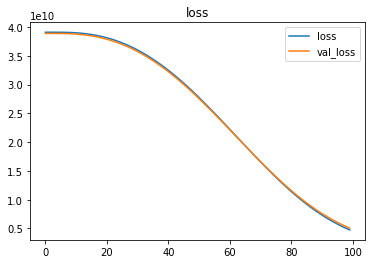

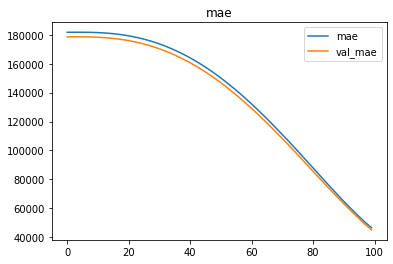

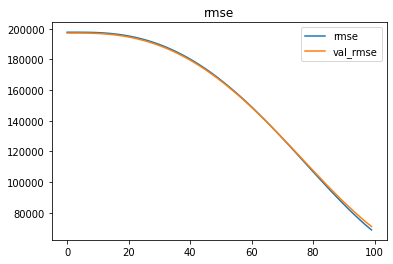

In [44]:
# plot learning
plot_history(history)

### Evaluate the model

In [45]:
# make predictions
train_preds = model.predict(X_train_processed)
test_preds = model.predict(X_test_processed)
#evaluate the model
train_scores = eval_regression(y_train, train_preds, name='Model training scores')
test_scores = eval_regression(y_test, test_preds, name = 'Model testing scores')
#update the regression metrics dataframe
compare_scores = pd.concat([train_scores, test_scores])
compare_scores

12/12 [==============================] - 0s 2ms/step


,RMSE,MAE,R2
Model Name,,,
Model training scores,68024.203538,45663.127544,0.237860
Model testing scores,71126.741811,45097.443161,0.277832


  - The R2 score shows that the model is using the features to explain only 23.79% of the training data and only 27.78% of the testing data.
  - The MAE shows that the model tends to make an error of $45097.44 on the testing data.
  - The RMSE is larger than the MAE, which shows that the model is making some larger errors on some samples.

Overall the first model had high bias--it was underfitting on the training data.

## Model 2

Increase the complexity by adding layers and adding neurons in order to reduce bias.

### Define the network structure

In [46]:
#save the number of features as the input shape
input_shape2 = X_train_processed.shape[1]
input_shape2

271

In [47]:
# Set random seeds for consistent outcomes
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
#sequential model
model2 = Sequential()

In [49]:
#first hidden layer
model2.add(Dense(271, input_dim = input_shape2, activation = 'relu')) 
#second hidden layer
model2.add(Dense(200, activation = 'relu'))
#third hidden layer
model2.add(Dense(150, activation = 'relu'))
#fourth hidden layer
model2.add(Dense(100, activation = 'relu'))
#fifth hidden layer
model2.add(Dense(20, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'linear'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 271)               73712     
                                                                 
 dense_1 (Dense)             (None, 200)               54400     
                                                                 
 dense_2 (Dense)             (None, 150)               30150     
                                                                 
 dense_3 (Dense)             (None, 100)               15100     
                                                                 
 dense_4 (Dense)             (None, 20)                2020      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 175,403
Trainable params: 175,403
Non-trai

### Compile the model

In [50]:
# compile model with additional metrics
rmse2 = RootMeanSquaredError(name='rmse2')
model2.compile(loss='mse', optimizer='adam', metrics= ['mae', rmse2])

### Fit the model

In [51]:
history2 = model2.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test),
                    epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 11ms/step - loss: 38986522624.0000 - mae: 181437.1875 - rmse2: 197450.0469 - val_loss: 38095179776.0000 - val_mae: 176458.8438 - val_rmse2: 195179.8594
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 26748860416.0000 - mae: 141751.3125 - rmse2: 163550.7812 - val_loss: 3361259264.0000 - val_mae: 32813.0273 - val_rmse2: 57976.3672
Epoch 3/100
35/35 [==============================] - 0s 8ms/step - loss: 2691973376.0000 - mae: 35881.7969 - rmse2: 51884.2305 - val_loss: 1621594240.0000 - val_mae: 23663.3555 - val_rmse2: 40269.0234
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: 1474297344.0000 - mae: 24403.5918 - rmse2: 38396.5781 - val_loss: 1444133632.0000 - val_mae: 22195.2793 - val_rmse2: 38001.7578
Epoch 5/100
35/35 [==============================] - 0s 7ms/step - loss: 1270939008.0000 - mae: 21200.3066 - rmse2: 35650.2305 - val_loss: 1263130240.0000 - val_mae: 20570.4102 - val_rms

### Plot the training history

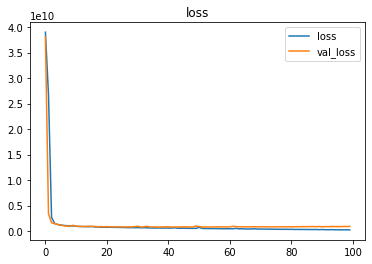

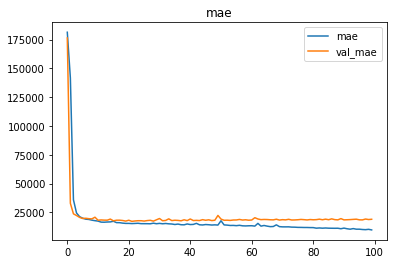

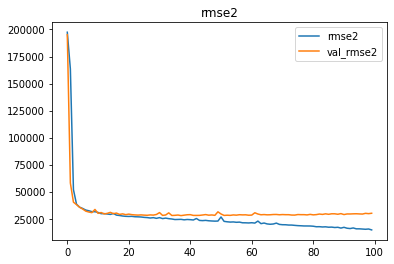

In [52]:
# plot learning
plot_history(history2)

### Evaluate the model

In [53]:
# make predictions
train_preds2 = model2.predict(X_train_processed)
test_preds2 = model2.predict(X_test_processed)
#evaluate the model
train_scores2 = eval_regression(y_train, train_preds2, name='Model 2 training scores')
test_scores2 = eval_regression(y_test, test_preds2, name = 'Model 2 testing scores')
#update the regression metrics dataframe
compare_scores2 = pd.concat([train_scores2, test_scores2])
compare_scores2 = compare_scores.append(compare_scores2)
compare_scores2

12/12 [==============================] - 0s 2ms/step


,RMSE,MAE,R2
Model Name,,,
Model training scores,68024.203538,45663.127544,0.237860
Model testing scores,71126.741811,45097.443161,0.277832
Model 2 training scores,14350.812972,9455.473627,0.966080
Model 2 testing scores,30013.248467,18932.169296,0.871413


  - The R2 score shows that Model 2 is using the features to explain 96.61% of the training data and 87.14% of the testing data.
  - The MAE shows that Model 2 tends to make an error of $18932.17 on the testing data.
  - The RMSE is larger than the MAE, which shows that Model 2 is making some larger errors on some samples.

Overall Model 2 had lower bias than the first model--increasing the complexity of the model successfully reduced the bias.  However, Model 2 had higher variance than the first model.  It was starting to overfit on the training data.

## Model 3

Keep the complexity of the model to minimize the bias.  Add regularization through dropout and early stopping in order to reduce overfitting.

### Define the network structure

In [54]:
#save the number of features as the input shape
input_shape3 = X_train_processed.shape[1]
input_shape3

271

In [55]:
# Set random seeds for consistent outcomes
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
#sequential model
model3 = Sequential()

In [57]:
#first hidden layer
model3.add(Dense(271, input_dim = input_shape3, activation = 'relu')) 
model3.add(Dropout(.2))
#second hidden layer
model3.add(Dense(200, activation = 'relu'))
model3.add(Dropout(.2))
#third hidden layer
model3.add(Dense(150, activation = 'relu'))
model3.add(Dropout(.2))
#fourth hidden layer
model3.add(Dense(100, activation = 'relu'))
model3.add(Dropout(.2))
#fifth hidden layer
model3.add(Dense(20, activation = 'relu'))
model3.add(Dropout(.2))
#output layer
model3.add(Dense(1, activation = 'linear'))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 271)               73712     
                                                                 
 dropout (Dropout)           (None, 271)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               54400     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               30150     
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               1

### Compile the model

In [58]:
# compile model with additional metrics
rmse3 = RootMeanSquaredError(name='rmse3')
model3.compile(loss='mse', optimizer='adam', metrics= ['mae', rmse3])
early_stopping = EarlyStopping(patience = 5)

### Fit the model

In [59]:
history3 = model3.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test),
                    epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 12ms/step - loss: 39001464832.0000 - mae: 181474.3594 - rmse3: 197487.8906 - val_loss: 38166618112.0000 - val_mae: 176634.5000 - val_rmse3: 195362.7812
Epoch 2/100
35/35 [==============================] - 0s 8ms/step - loss: 25534175232.0000 - mae: 135894.2812 - rmse3: 159794.1719 - val_loss: 3503069440.0000 - val_mae: 47891.4844 - val_rmse3: 59186.7344
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 4015776256.0000 - mae: 47065.1133 - rmse3: 63370.1523 - val_loss: 1546435968.0000 - val_mae: 23861.9941 - val_rmse3: 39324.7500
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: 3011398656.0000 - mae: 37961.9805 - rmse3: 54876.2109 - val_loss: 1681854080.0000 - val_mae: 24362.5312 - val_rmse3: 41010.4141
Epoch 5/100
35/35 [==============================] - 0s 7ms/step - loss: 3001431040.0000 - mae: 37680.7422 - rmse3: 54785.3164 - val_loss: 1406973312.0000 - val_mae: 21456.4980 - val_rms

### Plot the training history

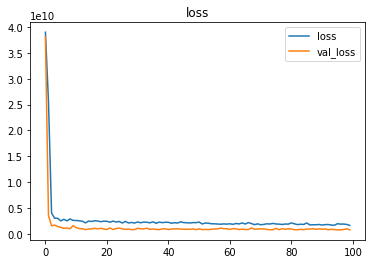

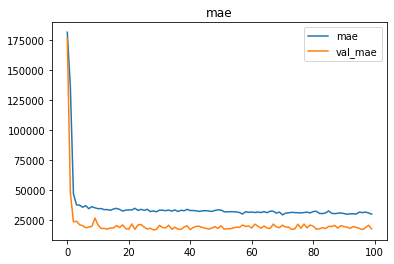

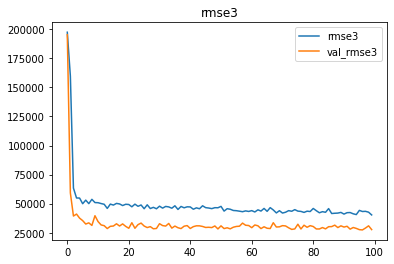

In [60]:
# plot learning
plot_history(history3)

### Evaluate the model

In [61]:
# make predictions
train_preds3 = model3.predict(X_train_processed)
test_preds3 = model3.predict(X_test_processed)
#evaluate the model
train_scores3 = eval_regression(y_train, train_preds3, name='Model 3 training scores')
test_scores3 = eval_regression(y_test, test_preds3, name = 'Model 3 testing scores')
#update the regression metrics dataframe
compare_scores3 = pd.concat([train_scores3, test_scores3])
compare_scores3 = compare_scores2.append(compare_scores3)
compare_scores3

12/12 [==============================] - 0s 2ms/step


,RMSE,MAE,R2
Model Name,,,
Model training scores,68024.203538,45663.127544,0.237860
Model testing scores,71126.741811,45097.443161,0.277832
Model 2 training scores,14350.812972,9455.473627,0.966080
Model 2 testing scores,30013.248467,18932.169296,0.871413
Model 3 training scores,18568.247255,12125.958872,0.943213
Model 3 testing scores,27650.814201,17984.480255,0.890859


  - The R2 score shows that Model 3 is using the features to explain 94.32% of the training data and 89.09% of the testing data.
  - The MAE shows that Model 3 tends to make an error of $17985.48 on the testing data.
  - The RMSE is larger than the MAE, which shows that Model 3 is making some larger errors on some samples.

Overall Model 3 had lower bias than Models 1 and 2--maintaining a complex model successfully lowered the bias.  It also had lower variance than Model 2--adding regularization through dropout helped reduce the variance.  Early stopping did not help reduce the variance, because the model ran for 100 epochs.  



## Model 4

Keep the complexity of the model to minimize the bias. Add epochs to increase the training.  Keep regularization through dropout and early stopping in order to reduce overfitting.

### Define the network structure

In [69]:
#save the number of features as the input shape
input_shape4 = X_train_processed.shape[1]
input_shape4

271

In [70]:
# Set random seeds for consistent outcomes
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
#sequential model
model4 = Sequential()

In [72]:
#first hidden layer
model4.add(Dense(271, input_dim = input_shape4, activation = 'relu')) 
model4.add(Dropout(.2))
#second hidden layer
model4.add(Dense(200, activation = 'relu'))
model4.add(Dropout(.2))
#third hidden layer
model4.add(Dense(150, activation = 'relu'))
model4.add(Dropout(.2))
#fourth hidden layer
model4.add(Dense(100, activation = 'relu'))
model4.add(Dropout(.2))
#fifth hidden layer
model4.add(Dense(20, activation = 'relu'))
model4.add(Dropout(.2))
#output layer
model4.add(Dense(1, activation = 'linear'))
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 271)               73712     
                                                                 
 dropout (Dropout)           (None, 271)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               54400     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               30150     
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               1

### Compile the model

In [73]:
# compile model with additional metrics
rmse4 = RootMeanSquaredError(name='rmse4')
model4.compile(loss='mse', optimizer='adam', metrics= ['mae', rmse4])
early_stopping = EarlyStopping()

### Fit the model

In [74]:
history4 = model4.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test),
                    epochs=1000)

Epoch 1/1000
35/35 [==============================] - 1s 11ms/step - loss: 39001464832.0000 - mae: 181474.3594 - rmse4: 197487.8906 - val_loss: 38166618112.0000 - val_mae: 176634.5000 - val_rmse4: 195362.7812
Epoch 2/1000
35/35 [==============================] - 0s 8ms/step - loss: 25534175232.0000 - mae: 135894.2812 - rmse4: 159794.1719 - val_loss: 3503069440.0000 - val_mae: 47891.4844 - val_rmse4: 59186.7344
Epoch 3/1000
35/35 [==============================] - 0s 7ms/step - loss: 4015776256.0000 - mae: 47065.1133 - rmse4: 63370.1523 - val_loss: 1546435968.0000 - val_mae: 23861.9941 - val_rmse4: 39324.7500
Epoch 4/1000
35/35 [==============================] - 0s 7ms/step - loss: 3011398656.0000 - mae: 37961.9805 - rmse4: 54876.2109 - val_loss: 1681854080.0000 - val_mae: 24362.5312 - val_rmse4: 41010.4141
Epoch 5/1000
35/35 [==============================] - 0s 7ms/step - loss: 3001431040.0000 - mae: 37680.7422 - rmse4: 54785.3164 - val_loss: 1406973312.0000 - val_mae: 21456.4980 - va

### Plot the training history

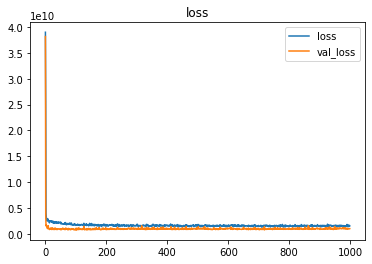

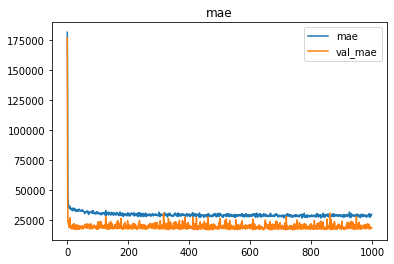

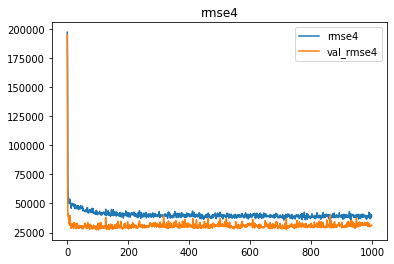

In [75]:
# plot learning
plot_history(history4)

### Evaluate the model

In [76]:
# make predictions
train_preds4 = model4.predict(X_train_processed)
test_preds4 = model4.predict(X_test_processed)
#evaluate the model
train_scores4 = eval_regression(y_train, train_preds4, name='Model 4 training scores')
test_scores4 = eval_regression(y_test, test_preds4, name = 'Model 4 testing scores')
#update the regression metrics dataframe
compare_scores4 = pd.concat([train_scores4, test_scores4])
compare_scores4 = compare_scores3.append(compare_scores4)
compare_scores4

12/12 [==============================] - 0s 2ms/step


,RMSE,MAE,R2
Model Name,,,
Model training scores,68024.203538,45663.127544,0.237860
Model testing scores,71126.741811,45097.443161,0.277832
Model 2 training scores,14350.812972,9455.473627,0.966080
Model 2 testing scores,30013.248467,18932.169296,0.871413
Model 3 training scores,18568.247255,12125.958872,0.943213
Model 3 testing scores,27650.814201,17984.480255,0.890859
Model 4 training scores,10299.484473,7926.584974,0.982528
Model 4 testing scores,31317.066416,18559.801488,0.859998


  - The R2 score shows that Model 4 is using the features to explain 98.25% of the training data and 86.00% of the testing data.
  - The MAE shows that Model 4 tends to make an error of $18559.80 on the testing data.
  - The RMSE is larger than the MAE, which shows that Model 4 is making some larger errors on some samples.

Overall, Model 4 had lower bias than Model 1, but higher bias than Models 2 and 3--increasing the number of epochs did not help lower the bias.  Model 4 also had higher variance than Model 3--increasing the training through more epochs increased overfitting, and early stopping did not help reduce the variance, because the model ran for 1000 epochs.

Model 3, a complex model with regularization through dropout, had the lowest bias and variance.  It used the features to explain 89.09% of the testing data, and it tended to make an error of $17985.48 on the testing data.